## 빅데이터 컴퓨팅 - 13주차

### 7.2.1장 - 예제 7-3 (포도주에 대한 주성분 분석)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

wine = load_wine()
df = pd.DataFrame(wine.data, columns = wine.feature_names)
df = StandardScaler().fit_transform(df)

pca_wine = PCA()
pca_wine.fit(df)
print("\n Eigeanvalues : \n", pca_wine.explained_variance_)


 Eigeanvalues : 
 [4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]


In [3]:
pca = PCA(n_components = 3)
pca_model = pca.fit(df)
df_trans = pd.DataFrame(pca_model.transform(df), columns = ['pca1', 'pca2', 'pca3'])
print(df_trans)

         pca1      pca2      pca3
0    3.316751 -1.443463 -0.165739
1    2.209465  0.333393 -2.026457
2    2.516740 -1.031151  0.982819
3    3.757066 -2.756372 -0.176192
4    1.008908 -0.869831  2.026688
..        ...       ...       ...
173 -3.370524 -2.216289 -0.342570
174 -2.601956 -1.757229  0.207581
175 -2.677839 -2.760899 -0.940942
176 -2.387017 -2.297347 -0.550696
177 -3.208758 -2.768920  1.013914

[178 rows x 3 columns]


In [5]:
comp = pd.DataFrame(pca_model.components_, columns = wine.feature_names)
print(comp.iloc[:,0:4])
print(comp.iloc[:,4:8])
print(comp.iloc[:,8:12])
print(comp.iloc[:,12:13])

    alcohol  malic_acid       ash  alcalinity_of_ash
0  0.144329   -0.245188 -0.002051          -0.239320
1 -0.483652   -0.224931 -0.316069           0.010591
2 -0.207383    0.089013  0.626224           0.612080
   magnesium  total_phenols  flavanoids  nonflavanoid_phenols
0   0.141992       0.394661    0.422934             -0.298533
1  -0.299634      -0.065040    0.003360             -0.028779
2   0.130757       0.146179    0.150682              0.170368
   proanthocyanins  color_intensity       hue  od280/od315_of_diluted_wines
0         0.313429        -0.088617  0.296715                      0.376167
1        -0.039302        -0.529996  0.279235                      0.164496
2         0.149454        -0.137306  0.085222                      0.166005
    proline
0  0.286752
1 -0.364903
2 -0.126746


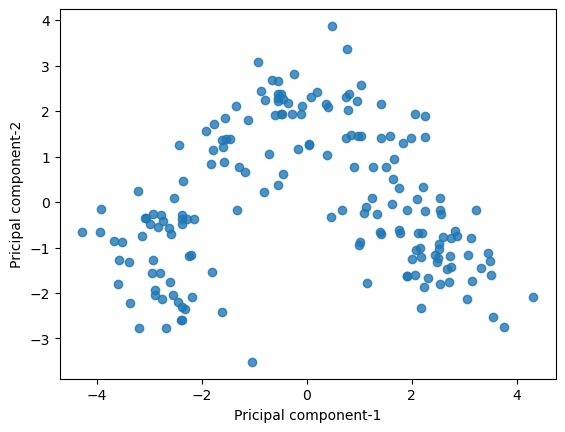

In [7]:
df = pd.read_excel(r".\BigData_Sources\wine_class_data.xlsx")
var_X = df.drop('class', axis = 1)
var_class = df['class']

df = StandardScaler().fit_transform(var_X)

pca = PCA(n_components = 2)
pca_model = pca.fit(df)
df_trans = pd.DataFrame(pca_model.transform(df), columns = ['pca1', 'pca2'])

plt.scatter(df_trans['pca1'], df_trans['pca2'], alpha = 0.8)
plt.xlabel('Pricipal component-1')
plt.ylabel('Pricipal component-2')
plt.show()

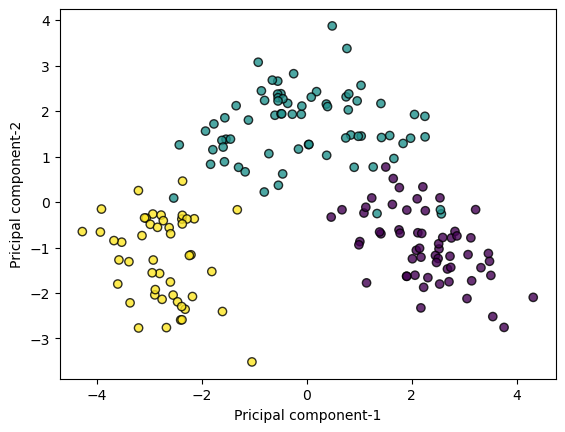

In [9]:
plt.scatter(df_trans['pca1'], df_trans['pca2'], c = var_class, edgecolors = 'k', alpha = 0.8)
plt.xlabel('Pricipal component-1')
plt.ylabel('Pricipal component-2')
plt.show()

### 7.2.1장 - 예제 7-4 (주식 수익률에 대한 인자분석)

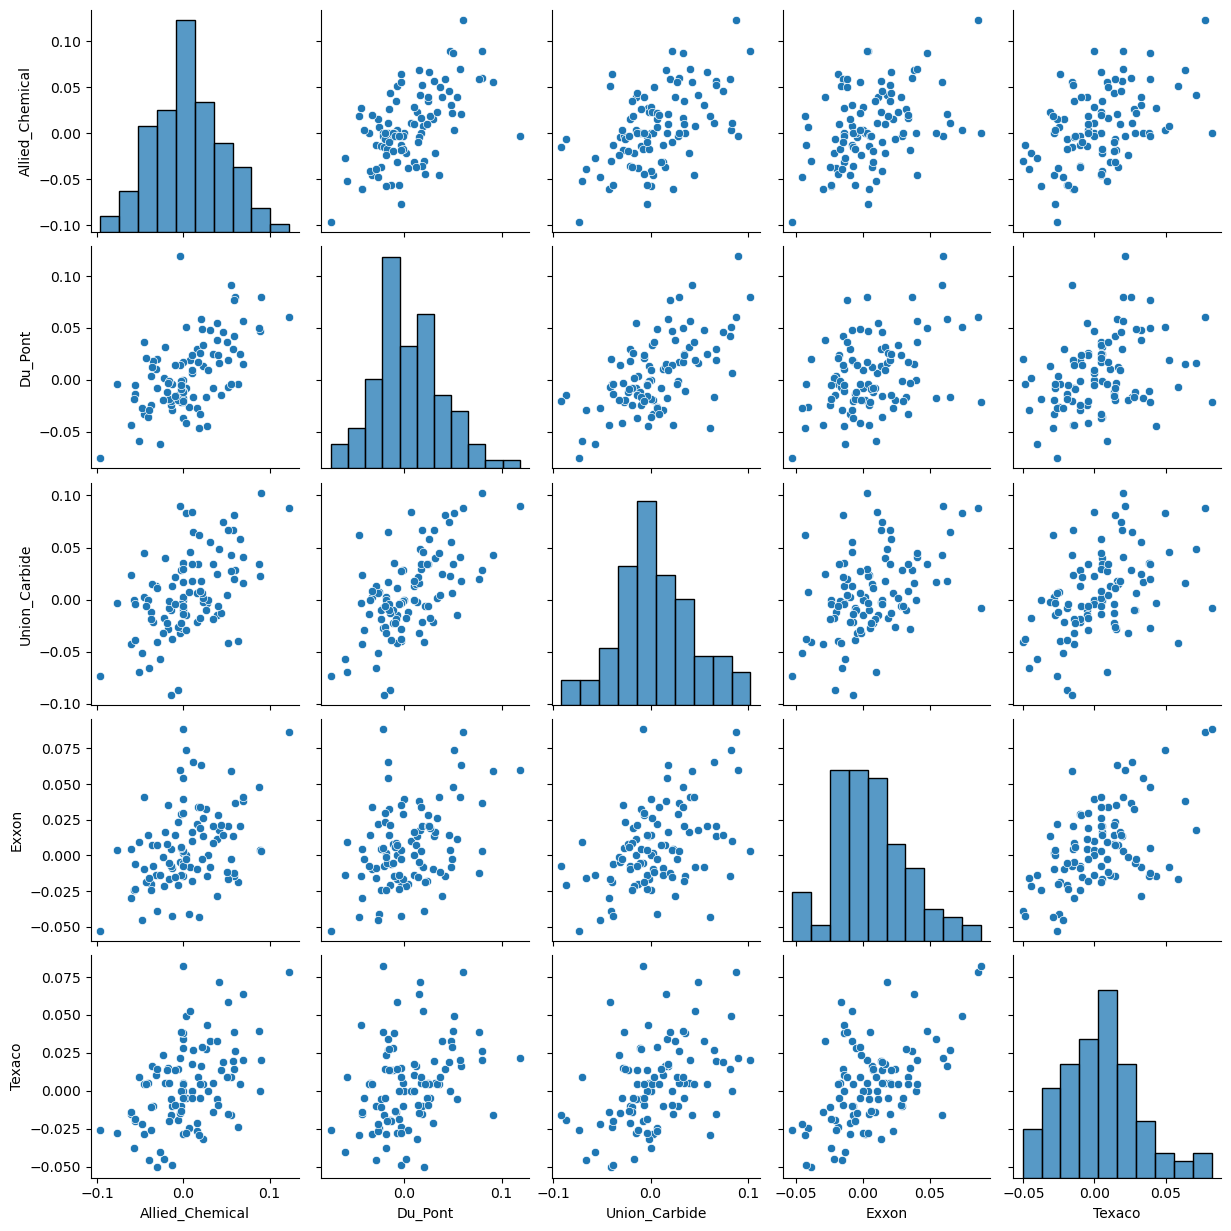

In [12]:
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer 
import matplotlib.pyplot as plt
import seaborn as sns

df_x = pd.read_excel(r".\BigData_Sources\stock_price.xlsx")

sns.pairplot(df_x, diag_kind='hist')
plt.show()

In [14]:
print('Correlatoin \n')
print(df_x.corr())
print('\n')
fa = FactorAnalyzer(n_factors=2, method='principal', rotation='varimax').fit(df_x)
print(pd.DataFrame(fa.loadings_, columns=['Factor1', 'Factor2'], index=df_x.columns))

print('\n')
print(pd.DataFrame(fa.get_communalities(), columns=['Communality Estimates'], index=df_x.columns))
print('\n')
df1 = pd.DataFrame(fa.get_factor_variance(), columns=['Factor1', 'Factor2'])
df1.index = ['SS Loadlings', 'Proportion Var', 'Comulative Var']
print('\n')
print(df1)
print('\n')

ev, v = fa.get_eigenvalues()
print(pd.DataFrame(ev, columns=['Variance explained by each Factor']))

Correlatoin 

                 Allied_Chemical   Du_Pont  Union_Carbide     Exxon    Texaco
Allied_Chemical         1.000000  0.576924       0.508656  0.386721  0.462178
Du_Pont                 0.576924  1.000000       0.598384  0.389519  0.321953
Union_Carbide           0.508656  0.598384       1.000000  0.436101  0.425627
Exxon                   0.386721  0.389519       0.436101  1.000000  0.523529
Texaco                  0.462178  0.321953       0.425627  0.523529  1.000000


                  Factor1   Factor2
Allied_Chemical  0.747317  0.319728
Du_Pont          0.889388  0.124388
Union_Carbide    0.766897  0.312657
Exxon            0.261909  0.813977
Texaco           0.229460  0.853652


                 Communality Estimates
Allied_Chemical               0.660709
Du_Pont                       0.806483
Union_Carbide                 0.685885
Exxon                         0.731155
Texaco                        0.781374




                 Factor1   Factor2
SS Loadlings    2.058872 

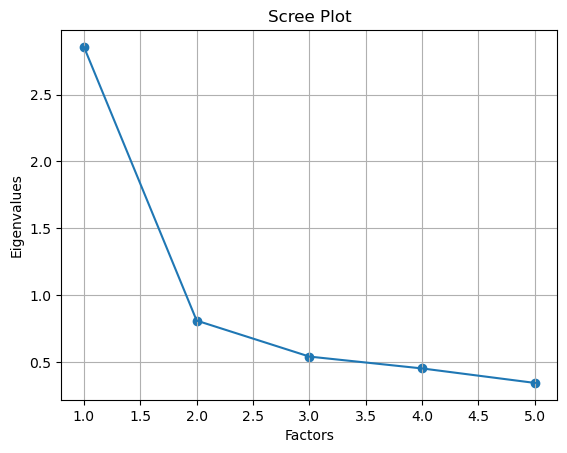

In [16]:
plt.scatter(range(1, df_x.shape[1]+1), ev)
plt.plot(range(1, df_x.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalues')
plt.grid()
plt.show()

### 7.2.2장 - 예제 7-5 (계층적 군집분석)

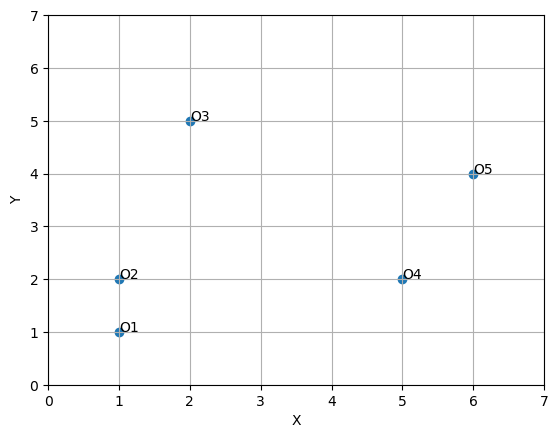

[[0.         1.         4.12310563 4.12310563 5.83095189]
 [1.         0.         3.16227766 4.         5.38516481]
 [4.12310563 3.16227766 0.         4.24264069 4.12310563]
 [4.12310563 4.         4.24264069 0.         2.23606798]
 [5.83095189 5.38516481 4.12310563 2.23606798 0.        ]]


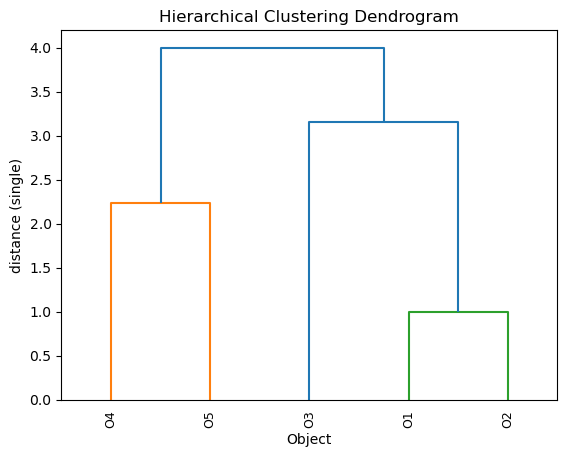

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram, linkage

df = pd.read_excel(r".\BigData_Sources\cluster_sample.xlsx")
label = df.Object
plt.scatter(df.X, df.Y)
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

for i, label in enumerate(label):
    plt.annotate(label, (df.X[i], df.Y[i]))
plt.show()

df = df.set_index('Object')
df_x =  df.reset_index(drop=True)

# Calculate the distance between each sample(euclidean 거리)
X_cdist = distance.cdist(df_x, df_x, metric='euclidean')
print(X_cdist)

# Calculate the distance between each cluster(최단연결법)
Z = linkage(df, 'single')

# Plot title
plt.title('Hierarchical Clustering Dendrogram')

# Plot axis labels
plt.xlabel('Object')
plt.ylabel('distance (single)')

# Make the dendrogram
dendrogram(Z, labels=df.index, leaf_rotation=90, leaf_font_size=9)

# Show the graph
plt.show()

### 7.2.2장 - 예제 7-6 (판별분석)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

LDA Means(Class-wise means)
[[5.006 3.428 1.462 0.246]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]

Overall mean
[5.84333333 3.05733333 3.758      1.19933333]

COEF(Weight vectors)
[[  6.31475846  12.13931718 -16.94642465 -20.77005459]
 [ -1.53119919  -4.37604348   4.69566531   3.06258539]
 [ -4.78355927  -7.7632737   12.25075935  17.7074692 ]]

LDA Covariance(within-class covariance matrix)
[[0.259708   0.09086667 0.164164   0.03763333]

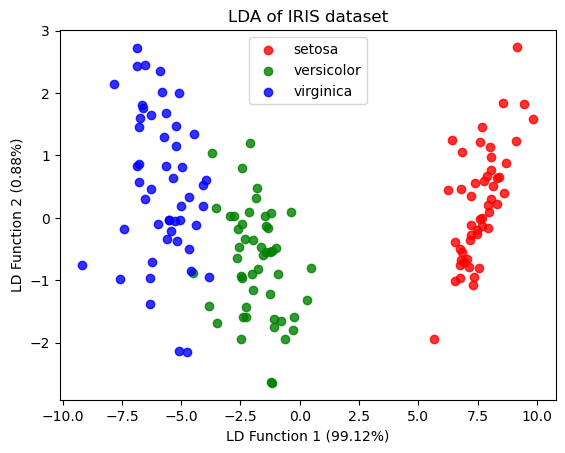

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix 

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris['target']
print(df.head())

X = iris.data
y = iris.target

target_names = iris.target_names
lda = LinearDiscriminantAnalysis(n_components=2,store_covariance=True)
X_r = lda.fit(X, y).transform(X)
print('\nLDA Means(Class-wise means)')
print(lda.means_)

print('\nOverall mean')
print(lda.xbar_)

print('\nCOEF(Weight vectors)')
print(lda.coef_)

print('\nLDA Covariance(within-class covariance matrix)')
print(lda.covariance_)

print('\nexplained_variance_ratio')
print(lda.explained_variance_ratio_)

print('\nscalings')
data = pd.DataFrame(lda.scalings_)
data.columns=["LD1","LD2"]
print(data)

print('\nscore of LD1 & LD2') 
data = pd.DataFrame(X_r)
data.columns=["LD1","LD2"]
print(data)

print('\nPrediction')
cf_m = pd.DataFrame(confusion_matrix(y, lda.predict(X)))
cf_m.columns = ['pred_setosa', 'pred_versicolor', 'pred_virginica']
cf_m.index = ['real_setosa', 'real_versicolor', 'real_virginica']
print(cf_m)

plt.figure()
colors =['red', 'green', 'blue']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('LD Function 1 (%.2f%%)' %(lda.explained_variance_ratio_[0]*100))
plt.ylabel('LD Function 2 (%.2f%%)' %(lda.explained_variance_ratio_[1]*100))
plt.title('LDA of IRIS dataset')
plt.show()

### 개념 잡는 데이터 분석 8장 - [상관분석] 행복지수 데이터 분석하기 예제

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df2020 = pd.read_csv(r".\BigData_Sources\2020.csv", index_col = 0)
df2021 = pd.read_csv(r".\BigData_Sources\2021.csv", index_col = 0)
df2020.head()

,Country name,Happiness score,upperwhisker,lowerwhisker,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Dystopia
Rank,,,,,,,,,,
1,Finland,7.8087,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,2.762835
2,Denmark,7.6456,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,2.432741
3,Switzerland,7.5599,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,2.350267
4,Iceland,7.5045,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,2.460688
5,Norway,7.4880,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,2.168266


In [27]:
df2021.head()

,Country name,Happiness score,upperwhisker,lowerwhisker,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Dystopia
Rank,,,,,,,,,,
1,Finland,7.842,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,3.253
2,Denmark,7.620,7.687,7.552,10.933,0.954,72.7,0.946,0.030,2.868
3,Switzerland,7.571,7.643,7.500,11.117,0.942,74.4,0.919,0.025,2.839
4,Iceland,7.554,7.670,7.438,10.878,0.983,73.0,0.955,0.160,2.967
5,Netherlands,7.464,7.518,7.410,10.932,0.942,72.4,0.913,0.175,2.798


In [29]:
df2020.drop(['upperwhisker', 'lowerwhisker', 'Dystopia'], axis = 1, inplace = True)
df2020.head()

,Country name,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
Rank,,,,,,,
1,Finland,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482
2,Denmark,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202
3,Switzerland,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911
4,Iceland,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944
5,Norway,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533


In [31]:
df2021.drop(['upperwhisker', 'lowerwhisker', 'Dystopia'], axis = 1, inplace = True)
df2021.head()

,Country name,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
Rank,,,,,,,
1,Finland,7.842,10.775,0.954,72.0,0.949,-0.098
2,Denmark,7.620,10.933,0.954,72.7,0.946,0.030
3,Switzerland,7.571,11.117,0.942,74.4,0.919,0.025
4,Iceland,7.554,10.878,0.983,73.0,0.955,0.160
5,Netherlands,7.464,10.932,0.942,72.4,0.913,0.175


In [33]:
df2020.columns = ['Country', 'Score', 'GDP.per.capita', 'Social.support', 'Life.expectancy', 'Freedom', 'Generosity']
df2020.head()

,Country,Score,GDP.per.capita,Social.support,Life.expectancy,Freedom,Generosity
Rank,,,,,,,
1,Finland,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482
2,Denmark,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202
3,Switzerland,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911
4,Iceland,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944
5,Norway,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533


In [35]:
df2021.columns = ['Country', 'Score', 'GDP.per.capita', 'Social.support', 'Life.expectancy', 'Freedom', 'Generosity']
df2021.head()

,Country,Score,GDP.per.capita,Social.support,Life.expectancy,Freedom,Generosity
Rank,,,,,,,
1,Finland,7.842,10.775,0.954,72.0,0.949,-0.098
2,Denmark,7.620,10.933,0.954,72.7,0.946,0.030
3,Switzerland,7.571,11.117,0.942,74.4,0.919,0.025
4,Iceland,7.554,10.878,0.983,73.0,0.955,0.160
5,Netherlands,7.464,10.932,0.942,72.4,0.913,0.175


In [37]:
df1 = df2020.copy()
df1.drop(['Country', 'Social.support', 'Life.expectancy', 'Generosity'], axis = 1, inplace = True)
df1

,Score,GDP.per.capita,Freedom
Rank,,,
1,7.8087,10.639267,0.949172
2,7.6456,10.774001,0.951444
3,7.5599,10.979933,0.921337
4,7.5045,10.772559,0.948892
5,7.4880,11.087804,0.955750
...,...,...,...
149,3.4759,6.625160,0.640881
150,3.3123,7.600104,0.900589
151,3.2992,7.865712,0.711458


In [39]:
corr = df1.corr()
corr
corr['Score'].sort_values(ascending = False)

Score             1.000000
GDP.per.capita    0.775374
Freedom           0.590597
Name: Score, dtype: float64

<Axes: >

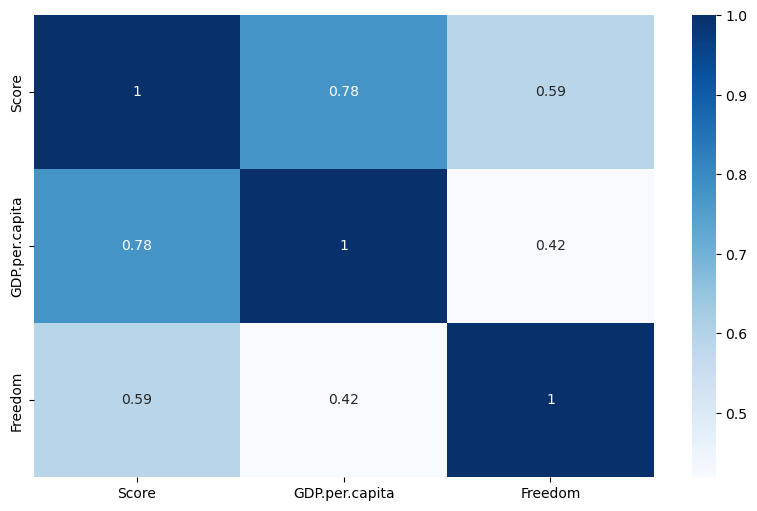

In [41]:
plt.figure(figsize = (10, 6))
sns.heatmap(corr, annot = True, cmap = 'Blues')

In [43]:
df2 = df2021.copy()
df2.drop(['Country', 'Social.support', 'Life.expectancy', 'Generosity'], axis = 1, inplace = True)
df2

,Score,GDP.per.capita,Freedom
Rank,,,
1,7.842,10.775,0.949
2,7.620,10.933,0.946
3,7.571,11.117,0.919
4,7.554,10.878,0.955
5,7.464,10.932,0.913
...,...,...,...
145,3.512,7.926,0.715
146,3.467,9.782,0.824
147,3.415,7.676,0.897


<Axes: >

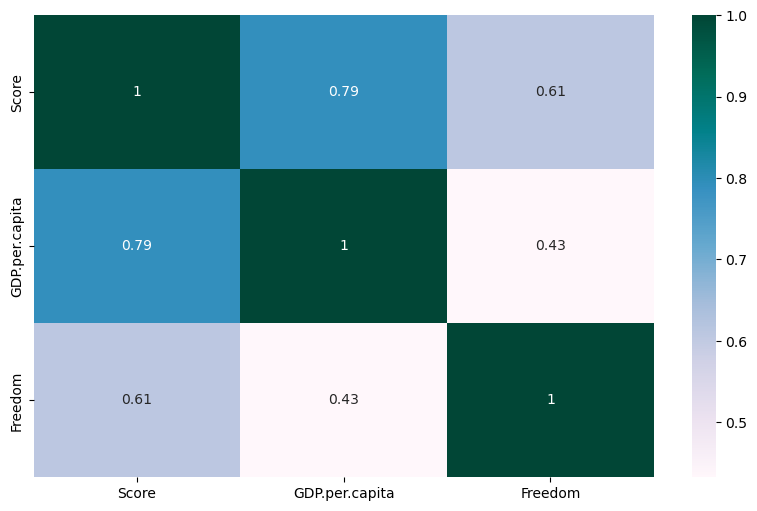

In [45]:
plt.figure(figsize = (10, 6))
sns.heatmap(df2.corr(), annot = True, cmap = 'PuBuGn')

In [47]:
x1 = df2020[['Generosity', 'Social.support', 'Score']].copy()
x2 = df2021[['Generosity', 'Social.support', 'Score']].copy()
x1

,Generosity,Social.support,Score
Rank,,,
1,-0.059482,0.954330,7.8087
2,0.066202,0.955991,7.6456
3,0.105911,0.942847,7.5599
4,0.246944,0.974670,7.5045
5,0.134533,0.952487,7.4880
...,...,...,...
149,0.082410,0.319460,3.4759
150,0.055484,0.540835,3.3123
151,-0.072064,0.763093,3.2992


In [49]:
x2

,Generosity,Social.support,Score
Rank,,,
1,-0.098,0.954,7.842
2,0.030,0.954,7.620
3,0.025,0.942,7.571
4,0.160,0.983,7.554
5,0.175,0.942,7.464
...,...,...,...
145,-0.131,0.787,3.512
146,-0.246,0.784,3.467
147,0.061,0.552,3.415


<Axes: >

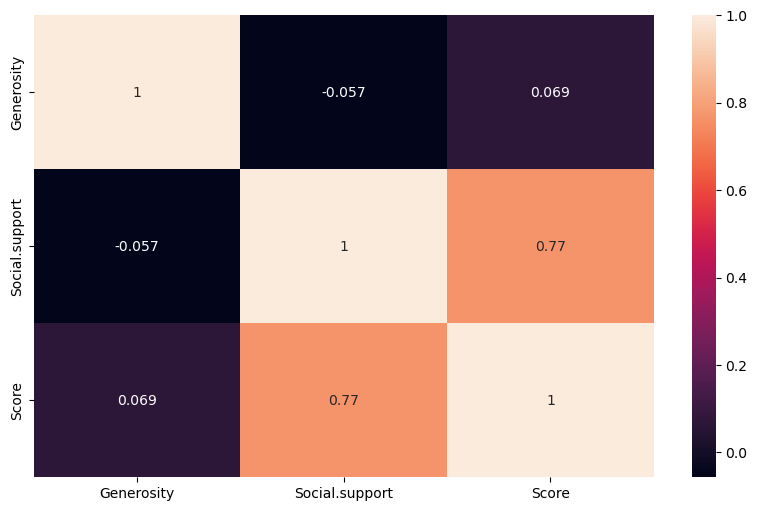

In [51]:
a1 = x1.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(a1, annot = True)

<Axes: >

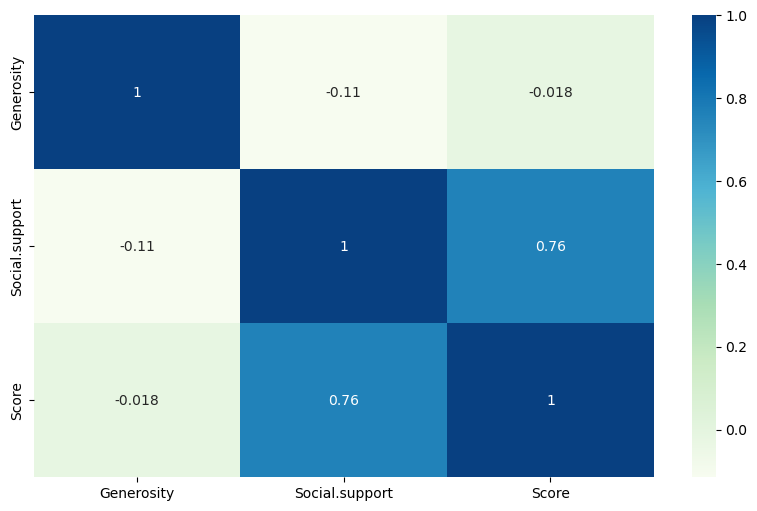

In [53]:
a2 = x2.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(a2, annot = True, cmap = 'GnBu')